In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("complete.csv")
df

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34735,Además de Mí - Remix,Rusherking,7I8L3vYCLThw2FDrE6LuzE,330040,0.61300,6,1,4,0.03960,0.397,0.000000,0.1920,-5.077,0.0549,0.4050,78.400,1
34736,Drunk,Elle King & Miranda Lambert,0QULNNd9z5s35entfiiXoa,245626,0.88400,5,1,4,0.00516,0.612,0.000000,0.0997,-4.400,0.0459,0.6260,119.991,1
34737,Breaking Up Was Easy In The 90's,Sam Hunt,4sf2L157iEgAR7yrCNLgSq,215933,0.64900,9,1,4,0.23100,0.562,0.000000,0.3410,-5.400,0.0494,0.3760,145.913,1
34738,Nobody,Dylan Scott,5TWAIHYaOnYg4txfmCgon5,160707,0.74700,0,1,4,0.51900,0.573,0.000001,0.0867,-6.460,0.0319,0.6450,79.952,1


In [2]:
df.describe()

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
count,3.474000e+04,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000,34740.000000
mean,2.189765e+05,0.595010,5.256477,0.646488,3.905325,0.288852,0.601277,0.184090,0.189592,-9.920885,0.096678,0.510255,119.940155,0.501583
std,1.208879e+05,0.237959,3.604624,0.478067,0.472741,0.309841,0.180962,0.337521,0.164997,5.733902,0.113405,0.268062,29.146159,0.500005
min,3.203000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1.739705e+05,0.445000,2.000000,0.000000,4.000000,0.029900,0.499000,0.000000,0.092900,-12.173000,0.035400,0.299000,99.019000,0.000000
50%,2.120000e+05,0.624000,5.000000,1.000000,4.000000,0.160000,0.624000,0.000069,0.123000,-8.554000,0.049200,0.514000,120.016000,1.000000
75%,2.516735e+05,0.781000,8.000000,1.000000,4.000000,0.482000,0.733000,0.105000,0.231000,-6.017000,0.097100,0.729000,137.025750,1.000000
max,5.610020e+06,1.000000,11.000000,1.000000,5.000000,0.996000,0.988000,1.000000,0.999000,2.291000,0.966000,1.000000,247.951000,1.000000


In [3]:
df.corr()

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
duration_ms,1.000000,0.044167,-0.000002,0.002835,0.059006,-0.052755,-0.036899,-0.094475,-0.007852,0.048655,-0.087478,-0.039740,0.006925,0.152852
energy,0.044167,1.000000,0.031927,-0.039043,0.179129,-0.615036,0.239266,-0.205659,0.183118,0.689142,0.039965,0.345347,0.193367,0.227209
key,-0.000002,0.031927,1.000000,-0.182317,0.012155,-0.010551,0.014434,-0.011499,0.004288,0.013204,0.016928,0.017791,0.004134,-0.003404
mode,0.002835,-0.039043,-0.182317,1.000000,-0.020723,0.045778,-0.068077,-0.045739,-0.014021,-0.002957,-0.093177,0.023014,0.016655,0.096454
time_signature,0.059006,0.179129,0.012155,-0.020723,1.000000,-0.171191,0.243080,-0.116590,-0.057525,0.203851,0.050894,0.141353,0.123083,0.117241
acousticness,-0.052755,-0.615036,-0.010551,0.045778,-0.171191,1.000000,-0.353362,0.185189,-0.016158,-0.509423,-0.053712,-0.234741,-0.178529,-0.214171
danceability,-0.036899,0.239266,0.014434,-0.068077,0.243080,-0.353362,1.000000,-0.221827,-0.187040,0.365764,0.231553,0.466859,0.050295,0.097668
instrumentalness,-0.094475,-0.205659,-0.011499,-0.045739,-0.116590,0.185189,-0.221827,1.000000,0.030618,-0.455396,-0.124625,-0.219130,-0.052475,-0.463793
liveness,-0.007852,0.183118,0.004288,-0.014021,-0.057525,-0.016158,-0.187040,0.030618,1.000000,-0.006903,0.072070,-0.072844,-0.033267,-0.035693
loudness,0.048655,0.689142,0.013204,-0.002957,0.203851,-0.509423,0.365764,-0.455396,-0.006903,1.000000,0.061767,0.272391,0.184596,0.302076


In [4]:
df["On_chart"].value_counts()

1    17425
0    17315
Name: On_chart, dtype: int64

In [5]:
df = df.drop(columns= ['artist_name'], axis=1)

In [6]:
df = df.drop(columns= ['track_title'], axis=1)

In [7]:
df = df.drop(columns= ['track_id'], axis=1)

In [8]:
df

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34735,330040,0.61300,6,1,4,0.03960,0.397,0.000000,0.1920,-5.077,0.0549,0.4050,78.400,1
34736,245626,0.88400,5,1,4,0.00516,0.612,0.000000,0.0997,-4.400,0.0459,0.6260,119.991,1
34737,215933,0.64900,9,1,4,0.23100,0.562,0.000000,0.3410,-5.400,0.0494,0.3760,145.913,1
34738,160707,0.74700,0,1,4,0.51900,0.573,0.000001,0.0867,-6.460,0.0319,0.6450,79.952,1


In [9]:
X = df.drop(columns="On_chart")
y=df["On_chart"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42, stratify=y)

In [10]:
X_tr_val, X_test_val, y_tr_val, y_test_val = train_test_split(X_train, y_train, test_size=.25, random_state=42, stratify=y_train)

In [11]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [12]:
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_tr_val), columns=X.columns)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train_imputed), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val_imputed), columns=X.columns)

In [15]:
def modeling_function(model, X_train, y_train, X_val, y_val):


    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)


    print('Training accuracy_score: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy_score: ', accuracy_score(y_val, val_preds))
    print('Training precision_score: ', precision_score(y_train, train_preds))
    print('Validation precision_score: ', precision_score(y_val, val_preds))


    return model

In [16]:
logreg1 = LogisticRegression()

In [17]:
modeling_function(logreg1, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  0.7697946651314527
Validation accuracy_score:  0.7710966685430634
Training precision_score:  0.7331047669281994
Validation precision_score:  0.7344478662560493


LogisticRegression()

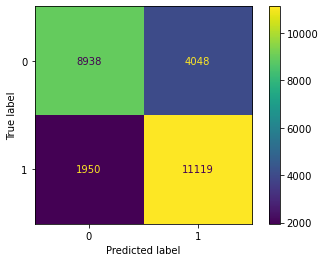

In [18]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg1, X_train_scaled, y_train)

In [19]:
logreg3 = LogisticRegression()

In [20]:
param_grid_logreg = {'penalty': ['l1', 'l2'],
                    'C': [1.0, 2.0, 3.0, 4.0],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'n_jobs': [-1]}

In [21]:
logreg_gs = GridSearchCV(estimator=logreg3, param_grid=param_grid_logreg, scoring='accuracy')

In [22]:
logreg_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [23]:
logreg_gs.best_params_

{'C': 1.0, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'sag'}

In [24]:
logreg3_best_params = logreg_gs.best_estimator_

In [25]:
modeling_function(logreg3_best_params, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  0.7697946651314527
Validation accuracy_score:  0.7710966685430634
Training precision_score:  0.7331047669281994
Validation precision_score:  0.7344478662560493


LogisticRegression(n_jobs=-1, solver='sag')

In [26]:
rf = RandomForestClassifier(random_state=2021)

In [27]:
modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  1.0
Validation accuracy_score:  1.0
Training precision_score:  1.0
Validation precision_score:  1.0


RandomForestClassifier(random_state=2021)